In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sympy
import numpy as np

In [3]:
from sympy import I

In [4]:
sympy.init_printing()

In [5]:
import qnet.misc.to_sympy_matrix

In [6]:
from two_node_slh import qnet_node_system, setup_qnet_sys

In [7]:
n_cavity = 2

In [8]:
SYS, Sym1, Op1, Sym2, Op2 = setup_qnet_sys(n_cavity=n_cavity, stark_shift=True, zero_phi=False, keep_delta=True)

In [9]:
SYS.H

OperatorPlus(ScalarTimesOperator(\Omega_{1}**2/(4*\Delta_{1}), LocalSigma(LocalSpace('atom', '1'), 'e', 'e')), ScalarTimesOperator(\Omega_{2}**2/(4*\Delta_{2}), LocalSigma(LocalSpace('atom', '2'), 'e', 'e')), ScalarTimesOperator(-\delta_{1}, OperatorTimes(Create(LocalSpace('cav', '1')), Destroy(LocalSpace('cav', '1')))), ScalarTimesOperator(I*\kappa, OperatorTimes(Create(LocalSpace('cav', '1')), Destroy(LocalSpace('cav', '2')))), ScalarTimesOperator(-\delta_{2}, OperatorTimes(Create(LocalSpace('cav', '2')), Destroy(LocalSpace('cav', '2')))), ScalarTimesOperator(-I*\kappa, OperatorTimes(Destroy(LocalSpace('cav', '1')), Create(LocalSpace('cav', '2')))), ScalarTimesOperator(-I*\Omega_{1}*g_{1}*exp(I*\phi_{1})/(2*\Delta_{1}), OperatorTimes(LocalSigma(LocalSpace('atom', '1'), 'e', 'g'), Destroy(LocalSpace('cav', '1')))), ScalarTimesOperator(I*\Omega_{1}*g_{1}*exp(-I*\phi_{1})/(2*\Delta_{1}), OperatorTimes(LocalSigma(LocalSpace('atom', '1'), 'g', 'e'), Create(LocalSpace('cav', '1')))), Scala

In [10]:
dw1 = Sym1['Omega']**2 / (4 * Sym1['Delta'])
g1t = Sym1['g'] * Sym1['Omega'] / (2 * Sym1['Delta'])
dw2 = Sym2['Omega']**2 / (4 * Sym2['Delta'])
g2t = Sym2['g'] * Sym2['Omega'] / (2 * Sym2['Delta'])

In [11]:
H = SYS.H.substitute({dw1: sympy.symbols('\delta\omega_1', real=True),
                  g1t: sympy.symbols('g_{1}^{(t)}', real=True),
                  dw2: sympy.symbols('\delta\omega_2', real=True),
                  g2t: sympy.symbols('g_{2}^{(t)}', real=True),
                 })

In [12]:
H

OperatorPlus(ScalarTimesOperator(\delta\omega_1, LocalSigma(LocalSpace('atom', '1'), 'e', 'e')), ScalarTimesOperator(\delta\omega_2, LocalSigma(LocalSpace('atom', '2'), 'e', 'e')), ScalarTimesOperator(-\delta_{1}, OperatorTimes(Create(LocalSpace('cav', '1')), Destroy(LocalSpace('cav', '1')))), ScalarTimesOperator(I*\kappa, OperatorTimes(Create(LocalSpace('cav', '1')), Destroy(LocalSpace('cav', '2')))), ScalarTimesOperator(-\delta_{2}, OperatorTimes(Create(LocalSpace('cav', '2')), Destroy(LocalSpace('cav', '2')))), ScalarTimesOperator(-I*\kappa, OperatorTimes(Destroy(LocalSpace('cav', '1')), Create(LocalSpace('cav', '2')))), ScalarTimesOperator(-I*g_{1}^{(t)}*exp(I*\phi_{1}), OperatorTimes(LocalSigma(LocalSpace('atom', '1'), 'e', 'g'), Destroy(LocalSpace('cav', '1')))), ScalarTimesOperator(I*g_{1}^{(t)}*exp(-I*\phi_{1}), OperatorTimes(LocalSigma(LocalSpace('atom', '1'), 'g', 'e'), Create(LocalSpace('cav', '1')))), ScalarTimesOperator(g_{1}**2/\Delta_{1}, OperatorTimes(LocalSigma(LocalSp

In [13]:
L = SYS.L[0,0]

In [14]:
L

OperatorPlus(ScalarTimesOperator(sqrt(2)*sqrt(\kappa), Destroy(LocalSpace('cav', '1'))), ScalarTimesOperator(sqrt(2)*sqrt(\kappa), Destroy(LocalSpace('cav', '2'))))

In [15]:
H.space

ProductSpace(LocalSpace('atom', '1'), LocalSpace('atom', '2'), LocalSpace('cav', '1'), LocalSpace('cav', '2'))

In [16]:
M = qnet.misc.to_sympy_matrix.convert_to_sympy_matrix(H)

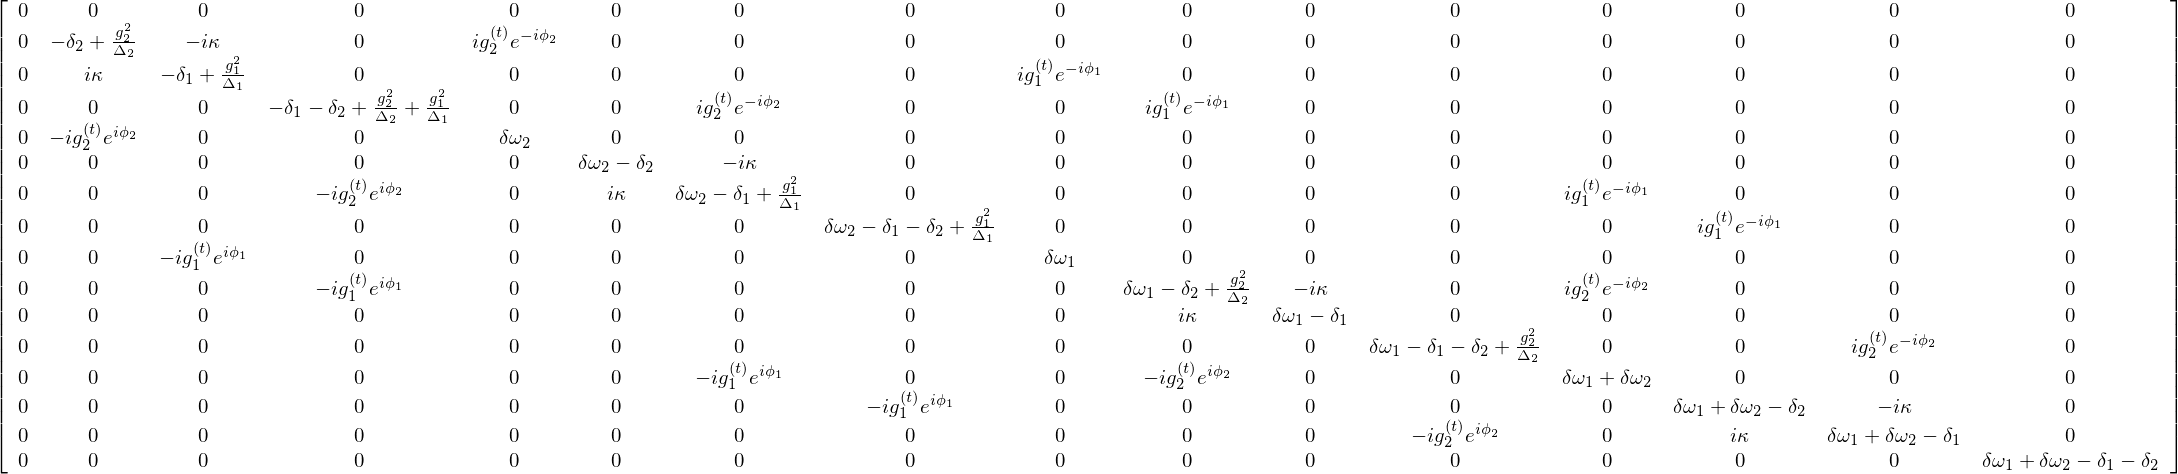

In [17]:
M